<a href="https://colab.research.google.com/github/guilhermelaviola/IntegratingPracticeInDataScienceForBusiness/blob/main/NaiveBayesSpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayes Spam Classifier**
You have a dataset containing emails that have been labeled as spam or not spam. Your task is to build a classification model using the Naive Bayes algorithm to predict whether an email is spam or not. You then evaluate the performance of the model and interpret the results.

# **Importing and Preprocessing Data**

In [38]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [39]:
# Generating a ficticious dataset:
# Sample email text and labels
data = {
    'text': [
        "Congratulations, you've won a $1000 gift card! Click here to claim now.",
        "Hey, can we reschedule our meeting to next week?",
        "Lowest prices on meds, guaranteed! Order now!",
        "Your Amazon order has been shipped.",
        "Earn money from home with this simple trick!",
        "Lunch today?",
        "Act now! Limited time offer on luxury watches!",
        "Here's the report you asked for. Let me know if you need edits.",
        "Urgent: Update your bank account information immediately.",
        "Don't forget our team call at 3 PM."
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = spam, 0 = not spam
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the dataset
print(df)

                                                text  label
0  Congratulations, you've won a $1000 gift card!...      1
1   Hey, can we reschedule our meeting to next week?      0
2      Lowest prices on meds, guaranteed! Order now!      1
3                Your Amazon order has been shipped.      0
4       Earn money from home with this simple trick!      1
5                                       Lunch today?      0
6     Act now! Limited time offer on luxury watches!      1
7  Here's the report you asked for. Let me know i...      0
8  Urgent: Update your bank account information i...      1
9                Don't forget our team call at 3 PM.      0


In [40]:
# Quick check on the dataset info:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10 non-null     object
 1   label   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes
None


In [41]:
# Remove missing or empty emails
df.dropna(inplace=True)
df['text'] = df['text'].astype(str).str.lower()

# **Vectorizing Data**

In [42]:
# Vectorize the email text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

# Target variable
y = df['label']

# **Splitting Data**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

In [44]:
# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# **Model Evaluation**

Acurácia: 0.5
Precisão: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


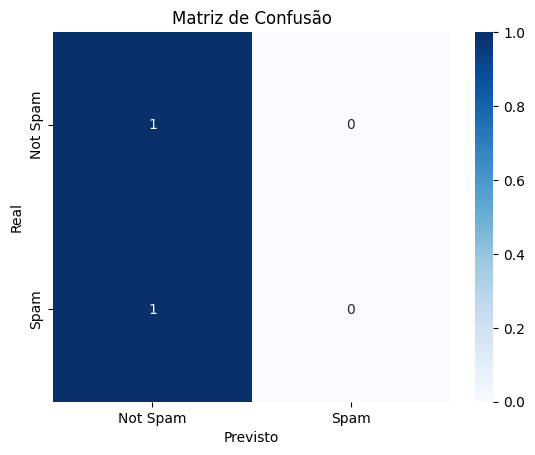

              precision    recall  f1-score   support

    Não Spam       0.50      1.00      0.67         1
        Spam       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
# Predicting on test set:
y_pred = model.predict(X_test)

# Metrics:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Classification report:
print(classification_report(y_test, y_pred, target_names=['Não Spam', 'Spam']))

# **Result Analysis**
## **Interpretation**
- **Accuracy**: Overall percentage of correctly classified emails.
- **Precision**: Out of all emails classified as spam, how many actually were spam.
- **Recall**: Out of all actual spam emails, how many the model correctly identified.
- **F1-score**: Harmonic mean of precision and recall.

## **Confusion Matrix**
- **True Positives (TP)**: Spam correctly identified.
- **True Negatives (TN)**: Non-spam correctly identified.
- **False Positives (FP)**: Non-spam marked as spam (Type I error).
- **False Negatives (FN)**: Spam not identified (Type II error).

## **Effectiveness**
If precision is high but recall is low, your model is cautious (avoids false positives but misses spam). If recall is high but precision is low, it's aggressive (flags a lot as spam, even some ham). Balance based on context (e.g., better recall if catching all spam is more critical).

## **Possible Improvements**
- Use TF-IDF instead of CountVectorizer.
- Apply text preprocessing: stemming/lemmatization, removing punctuation.
- Try ensemble methods like Random Forest or use deep learning for further improvements.
- Handle class imbalance if present (via class_weight or SMOTE).